In [1]:
#loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#overriding default setting of pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
aisles = pd.read_csv('/Users/19459/Documents/Practicum Project/Jyoti dump/aisles.csv')
departments = pd.read_csv('/Users/19459/Documents/Practicum Project/Jyoti dump/departments.csv')
products = pd.read_csv('/Users/19459/Documents/Practicum Project/Jyoti dump/products.csv')
orders = pd.read_csv('/Users/19459/Documents/Practicum Project/Jyoti dump/orders.csv')
train_order = pd.read_csv('/Users/19459/Documents/Practicum Project/Jyoti dump/order_products__train.csv')
prior_order = pd.read_csv('/Users/19459/Documents/Practicum Project/Jyoti dump/order_products__prior.csv')

In [3]:
aisles.head(5)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
departments.head(5)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
prior_order.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
train_order.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
products.head(5)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


## 3. Data Preprocessing

### Filling Missing Values

In [9]:
#check missing values

print("="*10 + "aisles.csv" + "="*10)
print(aisles.isnull().sum(axis = 0))
print()

print("="*10 + "departments.csv" + "="*10)
print(departments.isnull().sum(axis = 0))
print()

print("="*10 + "order_products__prior.csv" + "="*10)
print(prior_order.isnull().sum(axis = 0))
print()

print("="*10 + "order_products__train.csv" + "="*10)
print(train_order.isnull().sum(axis = 0))
print()

print("="*10 + "orders.csv" + "="*10)
print(orders.isnull().sum(axis = 0))
print()

print("="*10 + "products.csv" + "="*10)
print(products.isnull().sum(axis = 0))
print()

==========aisles.csv==========
aisle_id    0
aisle       0
dtype: int64

==========departments.csv==========
department_id    0
department       0
dtype: int64

==========order_products__prior.csv==========
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

==========order_products__train.csv==========
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

==========orders.csv==========
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

==========products.csv==========
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64



In [10]:
#find missing values in orders.csv
print("% of data which has missing values ")
print(orders.isnull().sum()/orders.shape[0])


print("\n% of unique users vs total data : ",orders.user_id.nunique()/len(orders))

% of data which has missing values 
order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    0.060276
dtype: float64

% of unique users vs total data :  0.06027594185817766


In [11]:
#check if null values are present only for 1st orders of all users
orders[orders['order_number']==1].isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

__conclusion__:

For every user's first order , days_since_prior_order is left empty .
It is safe to impute 0 here .


In [12]:
#imputation
orders.fillna(value = 0, inplace = True)

### Merging Data

To check interdependency of variables with each other , we will merge few tables together

In [13]:
#merge order_products__prior and order_products__train

prior_train_orders = pd.concat([prior_order, train_order]).sort_values(by=['order_id'])
print("Shape of prior_train_orders :", prior_train_orders.shape)
prior_train_orders.head(20)

Shape of prior_train_orders : (33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
1,1,11109,2,1
0,2,33120,1,1
1,2,28985,2,1


In [14]:
#merge prior_train_orders and products

prior_train_orders = pd.merge(left = prior_train_orders, right = products,
                             left_on='product_id', right_on='product_id').sort_values(by=['order_id']).reset_index(drop=True)

print("Shape of prior_train_orders :", prior_train_orders.shape)
prior_train_orders.head(10)

Shape of prior_train_orders : (33819106, 7)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15
2,1,13176,6,0,Bag of Organic Bananas,24,4
3,1,47209,7,0,Organic Hass Avocado,24,4
4,1,22035,8,1,Organic Whole String Cheese,21,16
5,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
6,1,10246,3,0,Organic Celery Hearts,83,4
7,1,49683,4,0,Cucumber Kirby,83,4
8,2,17794,6,1,Carrots,83,4
9,2,9327,3,0,Garlic Powder,104,13


In [15]:
#merge prior_train_orders and aisles

prior_train_orders = pd.merge(left = prior_train_orders, right = aisles,
                             left_on='aisle_id', right_on='aisle_id').sort_values(by=['order_id']).reset_index(drop=True)

print("Shape of prior_train_orders :", prior_train_orders.shape)

Shape of prior_train_orders : (33819106, 8)


In [16]:
#merge prior_train_orders and departments

prior_train_orders = pd.merge(left = prior_train_orders, right = departments,
                             left_on='department_id', right_on='department_id').sort_values(by=['order_id']).reset_index(drop=True)

print("Shape of prior_train_orders :", prior_train_orders.shape)
prior_train_orders.head(20)

Shape of prior_train_orders : (33819106, 9)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce
2,1,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce
3,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods
4,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce
5,1,47209,7,0,Organic Hass Avocado,24,4,fresh fruits,produce
6,1,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs
7,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
8,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
9,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce


In [17]:
#merge prior_train_orders with orders
# since orders have all prior/train/test data, we will merge only prior and train orders for EDA , but leave test orders untouched

prior_train_orders = pd.merge(left = prior_train_orders, right = orders,
                             left_on='order_id', right_on='order_id').sort_values(by=['order_id']).reset_index(drop=True)

print("Shape :", prior_train_orders.shape)
prior_train_orders.head(10)

Shape : (33819106, 15)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108,train,4,4,10,9.0
1,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
2,1,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce,112108,train,4,4,10,9.0
3,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,112108,train,4,4,10,9.0
4,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
5,1,47209,7,0,Organic Hass Avocado,24,4,fresh fruits,produce,112108,train,4,4,10,9.0
6,1,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs,112108,train,4,4,10,9.0
7,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs,112108,train,4,4,10,9.0
8,2,17794,6,1,Carrots,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
9,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [18]:
col_order = ['user_id',
 'order_id',
 'product_id',
  'aisle_id',
 'department_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle',
 'department',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

prior_train_orders = prior_train_orders[col_order]

## 4. EDA

In [19]:
prior_train_orders.head()

,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,reordered,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,112108,1,49302,120,16,1,1,Bulgarian Yogurt,yogurt,dairy eggs,train,4,4,10,9.0
1,112108,1,49683,83,4,4,0,Cucumber Kirby,fresh vegetables,produce,train,4,4,10,9.0
2,112108,1,13176,24,4,6,0,Bag of Organic Bananas,fresh fruits,produce,train,4,4,10,9.0
3,112108,1,43633,95,15,5,1,Lightly Smoked Sardines in Olive Oil,canned meat seafood,canned goods,train,4,4,10,9.0
4,112108,1,10246,83,4,3,0,Organic Celery Hearts,fresh vegetables,produce,train,4,4,10,9.0


In [20]:
prior_train_orders['reordered'].value_counts()

1    19955360
0    13863746
Name: reordered, dtype: int64

#### 4.1.1 Target Variable Distribution ?

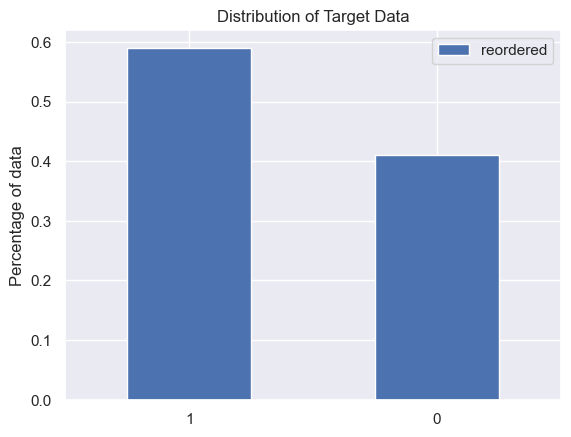

In [21]:
## Question : Target Variable Distribution ?

sns.set_theme()
ax = (prior_train_orders['reordered'].value_counts()/prior_train_orders.shape[0]).plot.bar()
ax.set_xticklabels(['1','0'], rotation = 0)  # convert it to first time orders and Reorders
ax.set_ylabel("Percentage of data")
ax.set_title('Distribution of Target Data')
ax.legend()

In [22]:
prior_set = prior_train_orders[prior_train_orders['eval_set']=='prior']
train_set = prior_train_orders[prior_train_orders['eval_set']=='train']

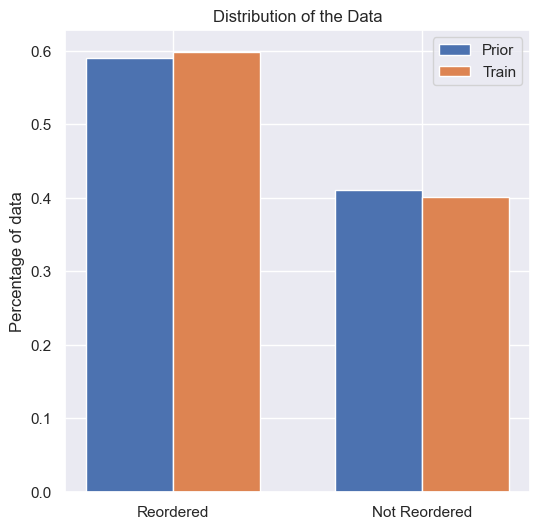

In [23]:
#plot distribution by percentage

prior_set = prior_set['reordered'].value_counts()/prior_set.shape[0]
train_set = train_set['reordered'].value_counts()/train_set.shape[0]

width = 0.35  
x = np.array([0,1])
fig, ax = plt.subplots(figsize=(6,6))
rects1 = ax.bar(x - width/2, prior_set, width, label='Prior')
rects2 = ax.bar(x + width/2, train_set, width, label='Train')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of data')
ax.set_title('Distribution of the Data')
ax.set_xticks(x)
ax.set_xticklabels(['Reordered','Not Reordered'])
ax.legend()
plt.show()


In [24]:
print("Total Users :",prior_train_orders['user_id'].nunique())
print("Users in train :",prior_train_orders[prior_train_orders['eval_set']=='train']['user_id'].nunique())
print("Users in test :",orders[orders['eval_set']=='test']['user_id'].nunique())

Total Users : 206209
Users in train : 131209
Users in test : 75000


#### 4.1.3 Orders - How many orders were placed by every user ?

In [25]:
#Question : How many orders were placed by every user ? 

orders_count = orders.groupby(['user_id'])['order_id'].agg(lambda group: len(group.unique()))\
                .reset_index(name='order_count')\
                .set_index('user_id')

In [26]:
print("Minimum orders per user :",orders_count['order_count'].min())
print("Maximum orders per user :",orders_count['order_count'].max())

Minimum orders per user : 4
Maximum orders per user : 100


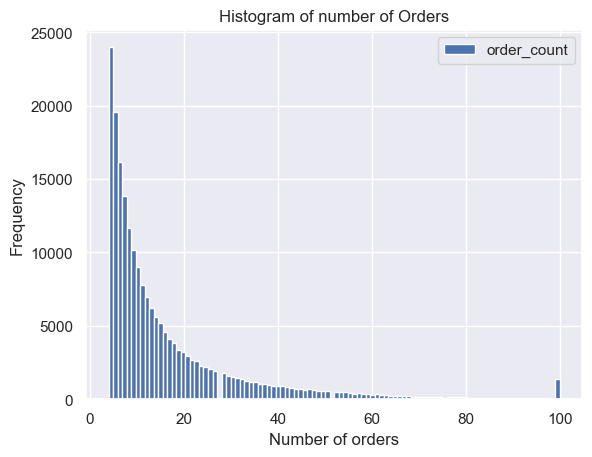

In [27]:
#plot histogram of orders

ax = orders_count.plot.hist(bins = 100)
ax.set_xlabel("Number of orders")
ax.set_title('Histogram of number of Orders')
ax.legend()

__Analysis__
- For every user we have around 4-100 order details ( including train and test)

#### 4.1.4 How many Orders with no reordered products ?

In [28]:
#Ques: How many Orders with no reordered products ?

orders_count = prior_train_orders.groupby(['order_id'])['reordered'].sum().reset_index(name = 'counts')
order_with_reordered_items , order_with_no_reordered_items= sum(orders_count['counts']!=0) , sum(orders_count['counts']==0)

#order_with_reordered_items/ total unique orders
print('Orders with reordered items :',order_with_reordered_items/prior_train_orders['order_id'].nunique())
print('Orders with no reordered items :',order_with_no_reordered_items/prior_train_orders['order_id'].nunique())

Orders with reordered items : 0.8813194412690899
Orders with no reordered items : 0.11868055873091014


__Analysis -__
- 12 % of orders have no reordered items, while rest ~88 % of orders contains reordered items

#### 4.1.5 Products - Frequently ordered products ?

In [29]:
print("There are total {} different products ".format(prior_train_orders['product_name'].nunique()))

There are total 49685 different products 


In [30]:
df = prior_train_orders.groupby(['product_name'])['product_name'].size().\
        reset_index(name = 'order_rate').sort_values(by ='order_rate', ascending = False)
df['order_rate'] = df['order_rate']/prior_train_orders['order_id'].nunique()
df.set_index('product_name', inplace = True)
df.round(5)

,order_rate
product_name,
Banana,0.14683
Bag of Organic Bananas,0.11803
Organic Strawberries,0.08236
Organic Baby Spinach,0.07522
Organic Hass Avocado,0.06601
...,...
Greek Blended Cherry Fat Free Yogurt,0.00000
All Natural Stevia Liquid Extract Sweetener,0.00000
"Frittata, Farmer's Market",0.00000


Text(0.5, 1.0, 'Frequently ordered product')

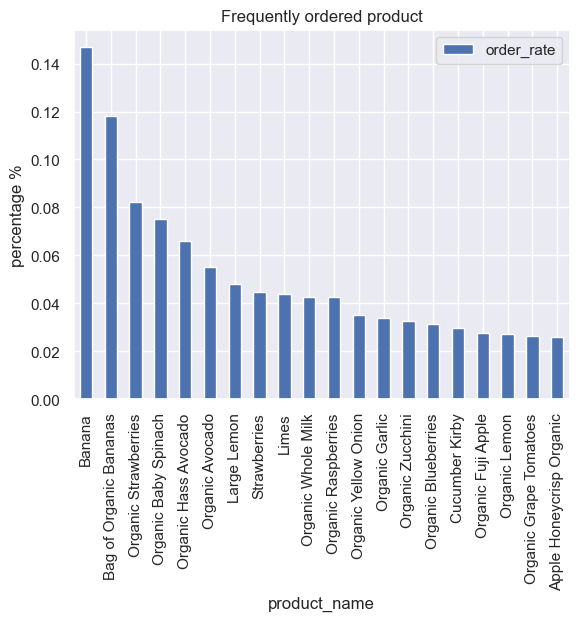

In [31]:
ax = df[:20].plot.bar()
ax.set_ylabel("percentage %")
ax.set_title('Frequently ordered product')

In [32]:
# print least frequently ordered product by count

print("Least frequently ordered product ")
print("\n",prior_train_orders['product_name'].value_counts()[-10:])

Least frequently ordered product 

 String Of Pearl White Sprinkles                           1
Organic Aleppo Pepper                                     1
Sloppy Joe Sandwich Makers                                1
Flax Oil, Organic, Omega-3, Original Formula              1
Max White With Polishing Star Soft Toothbrush             1
12 Inch Taper Candle White                                1
Pure Performance Restorative Shampoo Chamomile & Honey    1
Yellow Fish Breading                                      1
Orangemint Flavored Water                                 1
Flatbread Pizza All Natural                               1
Name: product_name, dtype: int64


__Analysis__

- It can be seen that most of the products which are ordered are organic foods / fresh fruits (especially Bananas)
- Bananas have highest order rate of 0.14.
- Least ordered products include Wasabi Cheddar Spreadable Cheese ,Vitamin D Gummies, Escapes Variety Pack etc

#### 4.1.6  Products - Frequently re-ordered products ?

In [33]:
#ques : Frequently reordered product ?
#percentage - of products reordered

df = prior_train_orders[prior_train_orders['reordered'] ==1].groupby(['product_name'])['product_name'].size().\
        reset_index(name = 'reorder_rate').sort_values(by ='reorder_rate', ascending = False)
df['reorder_rate'] = df['reorder_rate']/prior_train_orders[prior_train_orders['reordered'] ==1]['order_id'].nunique()
df.set_index('product_name', inplace = True)
df.round(5)

,reorder_rate
product_name,
Banana,0.14078
Bag of Organic Bananas,0.11166
Organic Strawberries,0.07272
Organic Baby Spinach,0.06610
Organic Hass Avocado,0.05974
...,...
Raspberry Cheesecake,0.00000
Liquid Vitamin B-Complex Natural Tangerine Flavor,0.00000
Oktoberfest Malt Liquor,0.00000


Text(0.5, 1.0, 'Frequently reordered product')

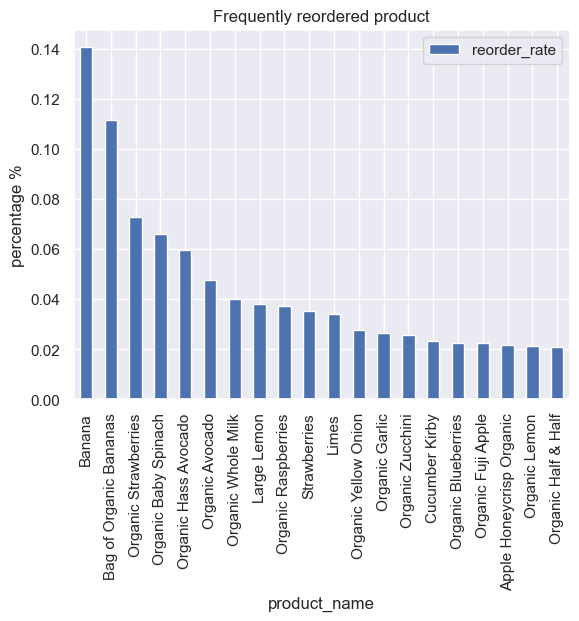

In [34]:
ax = df[:20].plot.bar()
ax.set_ylabel("percentage %")
ax.set_title('Frequently reordered product')

In [35]:
#frequently reordered product by count

print("\nLeast frequently reordered product ")
print("\n",prior_train_orders[prior_train_orders['reordered'] ==1]['product_name'].value_counts()[-10:])


Least frequently reordered product 

 38210 Full Jaw Cuticle Nipper                                              1
Black Pearl Liquid Eyeliner                                                1
Original Ultra Concentrated Dish Liquid                                    1
Black Garlic Bulbs                                                         1
Skullcap Extract                                                           1
Biotin 1000 mcg Tablets                                                    1
Hot & Spicy with Beans Chili                                               1
Sweet Gala Apples with Almonds & Sliced Apples with Mild Cheddar Cheese    1
SPF 20 Vanilla Lip Balm                                                    1
Wild Rice, 100% Natural                                                    1
Name: product_name, dtype: int64


#### 4.1.7 Aisles - ordered / reordered

In [36]:
#aisles

print("There are total {} different aisles ".format(prior_train_orders['aisle'].nunique()))

There are total 134 different aisles 


In [38]:
pip install squarify


Note: you may need to restart the kernel to use updated packages.


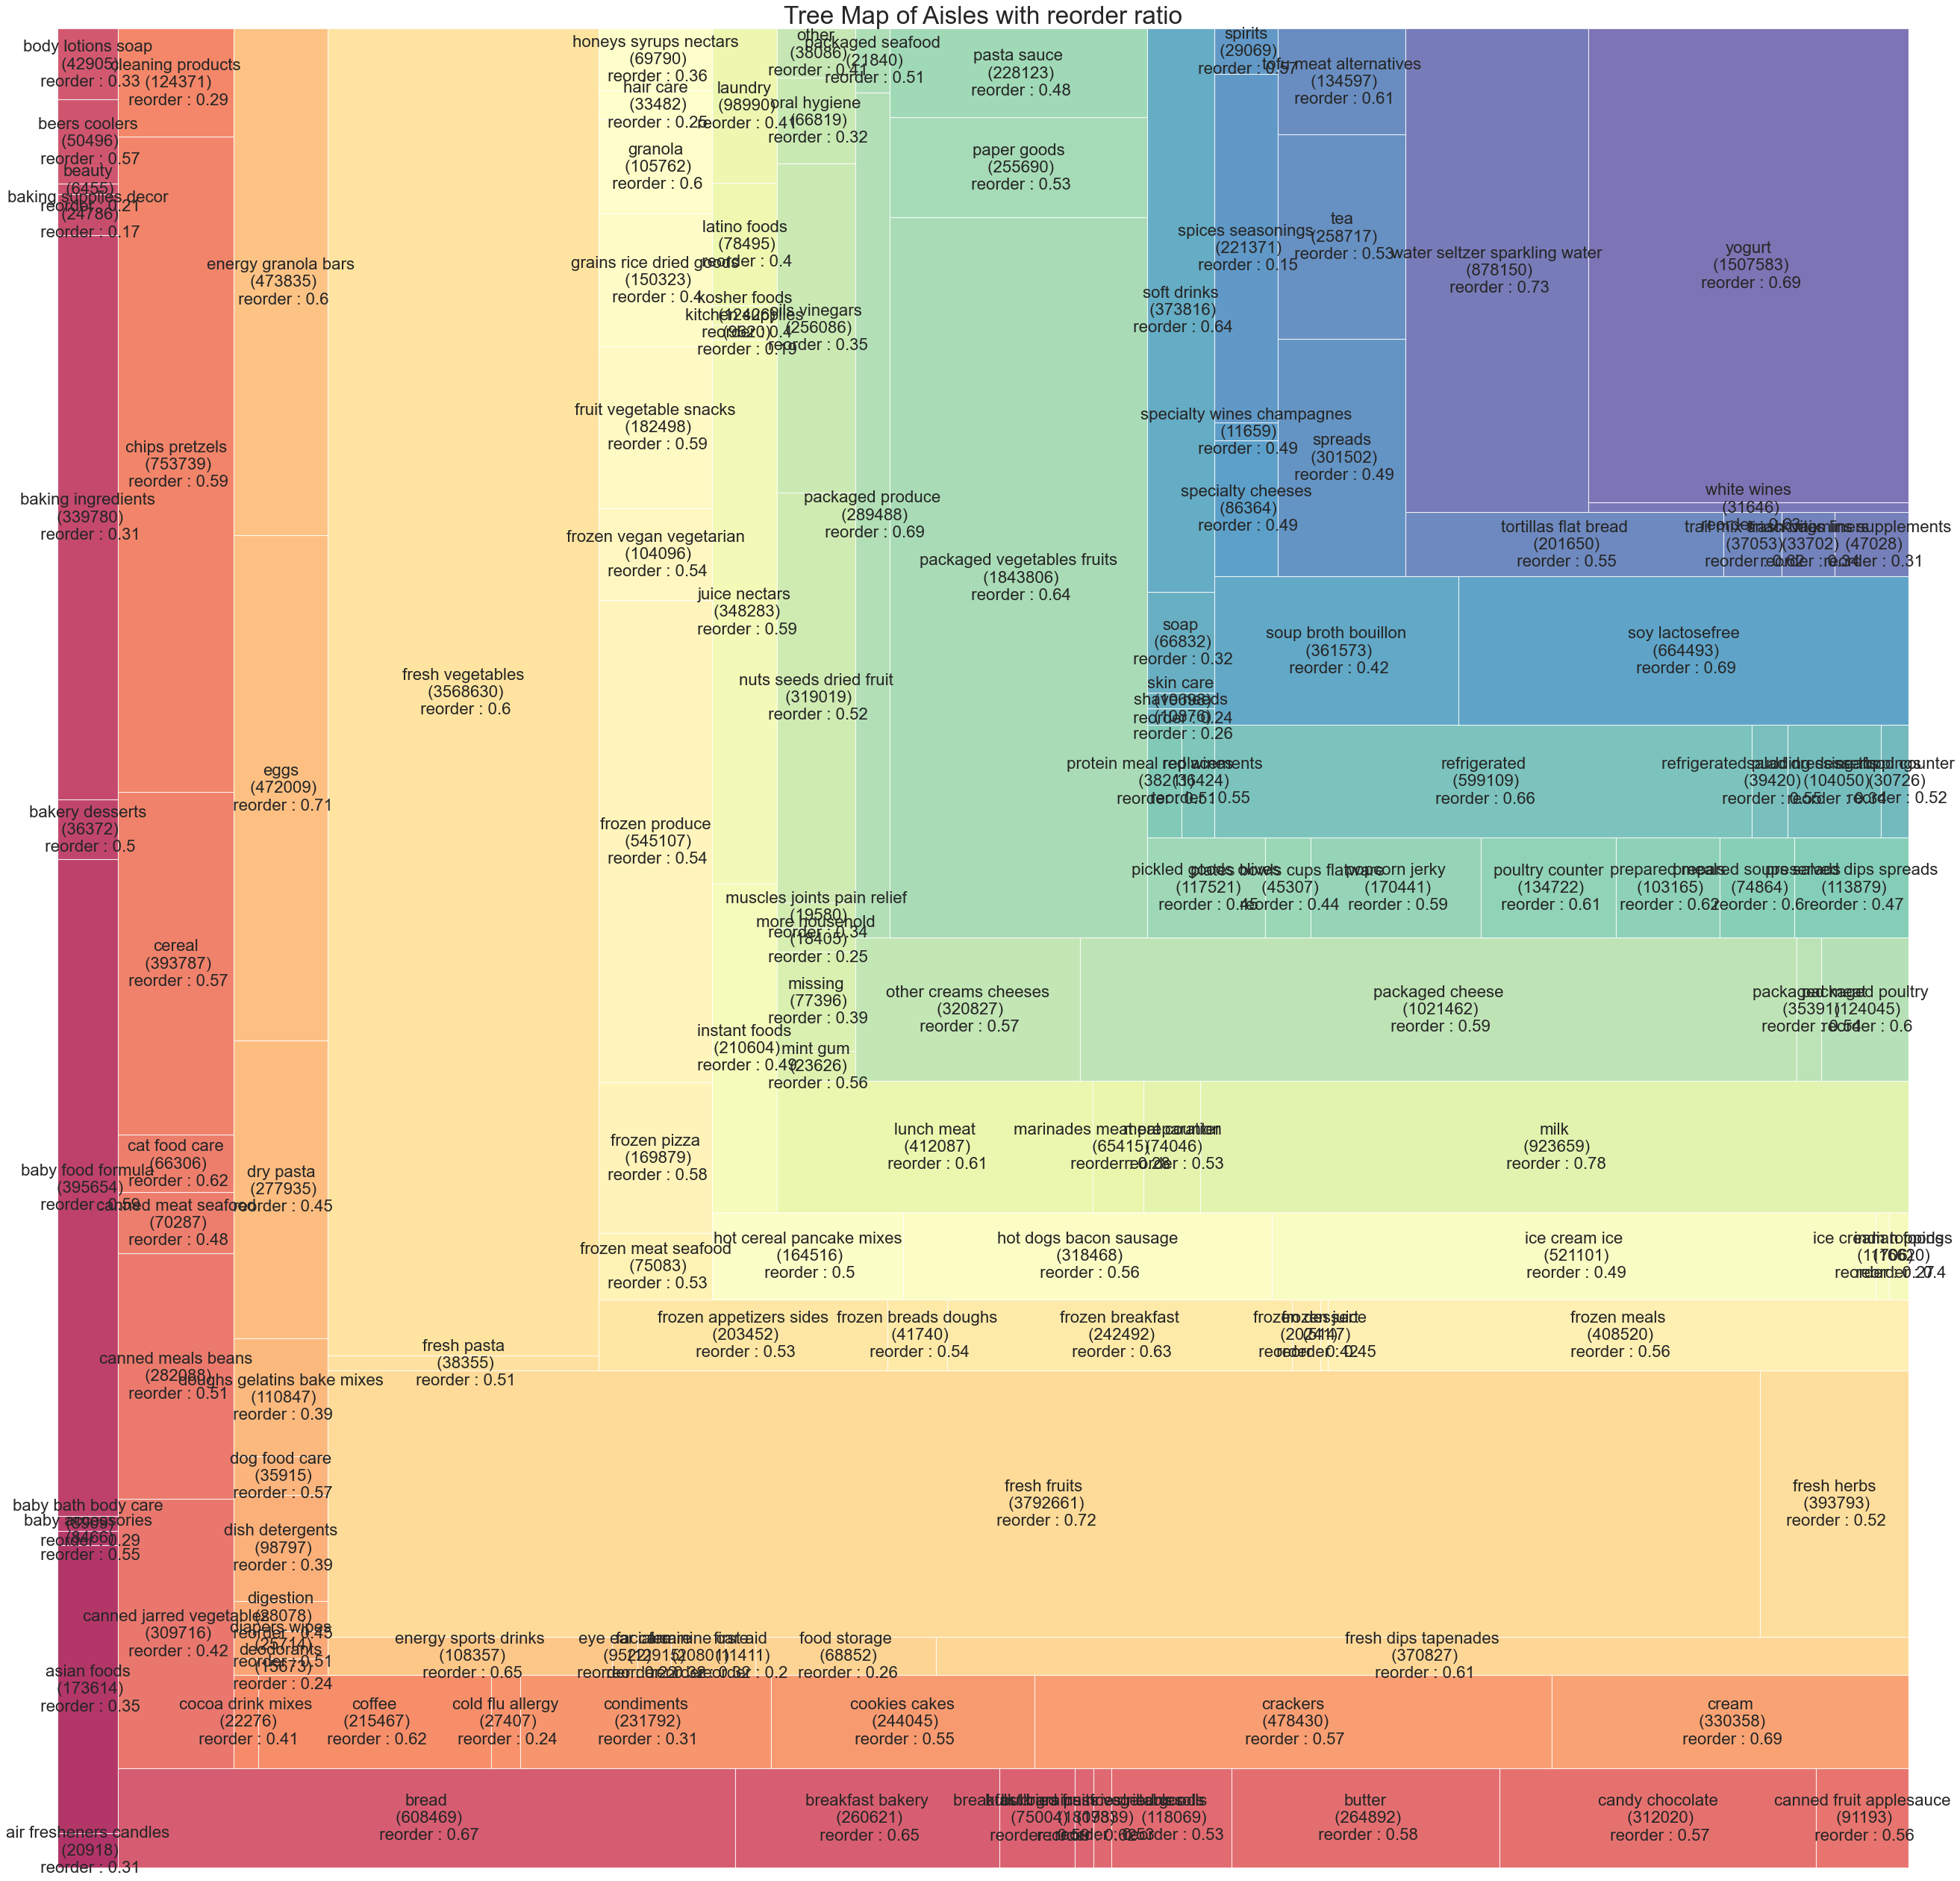

In [37]:
#plot tree map of aisles showing order_count and reorder rate
# ref: https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

import squarify 

# Prepare Data
df = prior_train_orders.groupby(['aisle']).size().reset_index(name='order_count')
aisle_reorder_rate = prior_train_orders[prior_train_orders['reordered']==1].groupby(['aisle']).size().reset_index(name='reorder_rate')
df['reorder_rate'] = aisle_reorder_rate['reorder_rate']/df['order_count']

labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")" + "\n reorder : "+ str(round(x[2],2)) , axis=1)
sizes = df['order_count'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(40,40), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8, text_kwargs={'fontsize':20})

# Decorate
plt.title('Tree Map of Aisles with reorder ratio', fontsize = 30)
plt.axis('off')
plt.show()

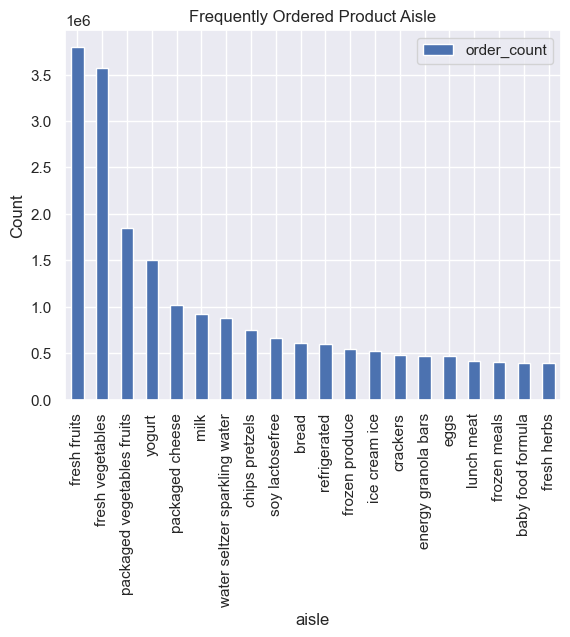

In [38]:
#plot bar plot of top 20 aisles based on order count

ax = df[['aisle','order_count']].sort_values(by='order_count', ascending = False)[:20].plot.bar(x = 'aisle', y='order_count')
ax.set_ylabel("Count")
ax.set_title('Frequently Ordered Product Aisle')
ax.legend()

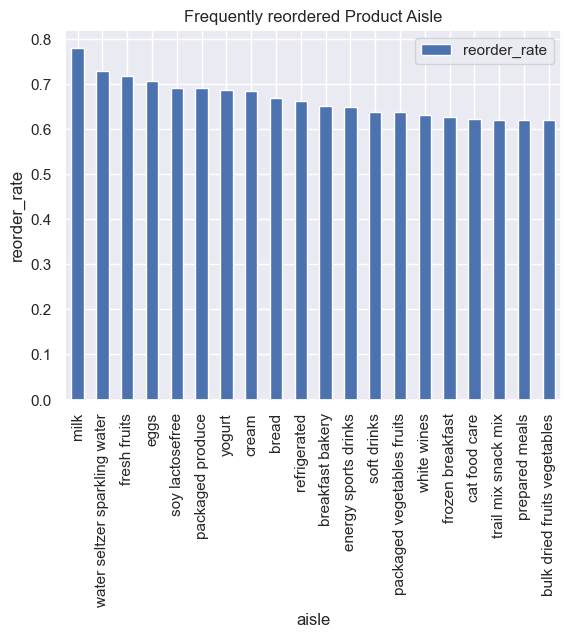

In [39]:
#plot bar plot of top 20 aisles based on their reorder rate

ax = df[['aisle','reorder_rate']].sort_values(by='reorder_rate', ascending = False)[:20].plot.bar(x = 'aisle', y='reorder_rate')
ax.set_ylabel("reorder_rate")
ax.set_title('Frequently reordered Product Aisle')
ax.legend()

In [40]:
# get most frequently reordered product from each aisle

df.sort_values(by = 'reorder_rate', axis=0, ascending=False, inplace = True)

print("Most frequently reordered product aisles")
df[:10]

Most frequently reordered product aisles


,aisle,order_count,reorder_rate
83,milk,923659,0.781812
131,water seltzer sparkling water,878150,0.729930
50,fresh fruits,3792661,0.718823
41,eggs,472009,0.706359
119,soy lactosefree,664493,0.692361
96,packaged produce,289488,0.691977
133,yogurt,1507583,0.686501
33,cream,330358,0.685184
11,bread,608469,0.670552
110,refrigerated,599109,0.663006


In [41]:
#get least frequently reordered product from each aisle

print("Least frequently reordered product aisles")
df[-10:]

Least frequently reordered product aisles


,aisle,order_count,reorder_rate
67,hair care,33482,0.246759
115,skin care,10698,0.242849
34,deodorants,15673,0.238818
29,cold flu allergy,27407,0.235341
44,eye ear care,9522,0.220542
8,beauty,6455,0.212858
47,first aid,11411,0.195864
76,kitchen supplies,9620,0.194802
7,baking supplies decor,24786,0.167595
122,spices seasonings,221371,0.152933


#### 4.1.8 Department - ordered/ reordered

In [42]:
#department

print("There are total {} different departments ".format(prior_train_orders['department'].nunique()))

There are total 21 different departments 


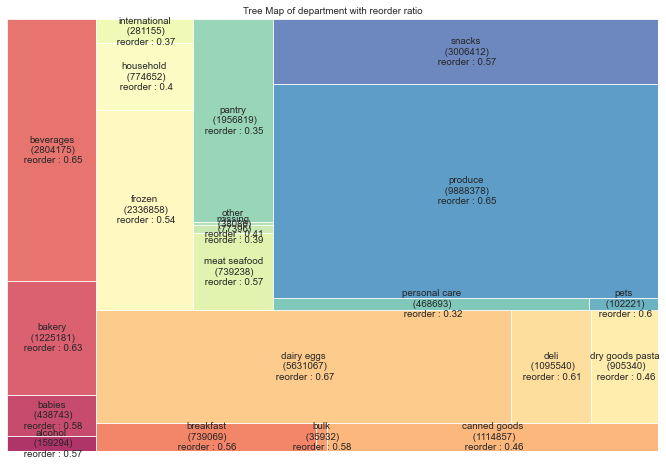

In [43]:
# get tree map of departments and display their order count and reorder rate
# ref: https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

# Prepare Data
df = prior_train_orders.groupby(['department']).size().reset_index(name='order_count')
dept_reorder_rate = prior_train_orders[prior_train_orders['reordered']==1].groupby(['department']).size().reset_index(name='reorder_rate')
df['reorder_rate'] = dept_reorder_rate['reorder_rate']/df['order_count']

labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")" + "\n reorder : "+ str(round(x[2],2)) , axis=1)
sizes = df['order_count'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 70)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8, text_kwargs={'fontsize':10})

# Decorate
plt.title('Tree Map of department with reorder ratio', fontsize = 10)
plt.axis('off')
plt.show()

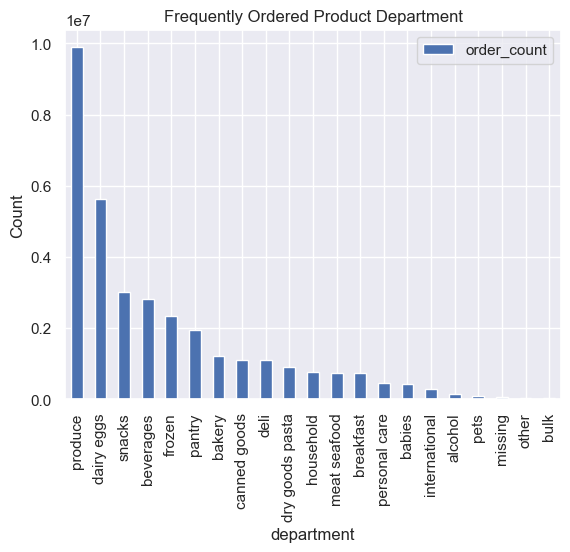

In [44]:
# plot departments by their order rate

ax = df[['department','order_count']].sort_values(by='order_count', ascending = False).plot.bar(x = 'department', y='order_count')
ax.set_ylabel("Count")
ax.set_title('Frequently Ordered Product Department')
ax.legend()

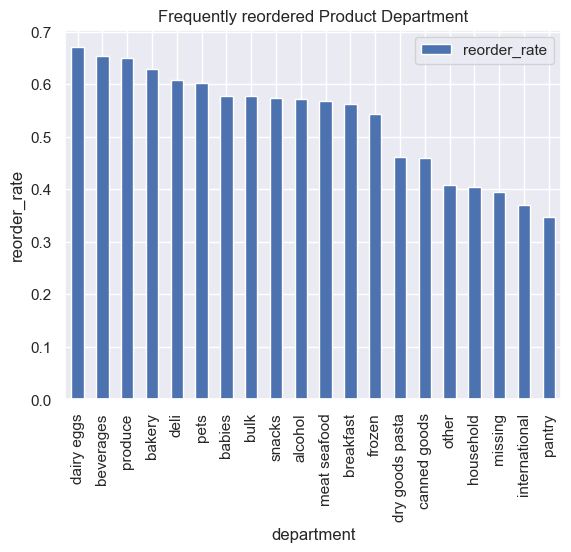

In [45]:
#plot bar plot of top 20 Department based on their reorder rate

ax = df[['department','reorder_rate']].sort_values(by='reorder_rate', ascending = False)[:20].plot.bar(x = 'department', y='reorder_rate')
ax.set_ylabel("reorder_rate")
ax.set_title('Frequently reordered Product Department')
ax.legend()

In [46]:
# get most frequently reordered product from each department

df.sort_values(by = 'reorder_rate', axis=0, ascending=False, inplace = True)

print("Most frequently reordered product departments")
df[:5]

Most frequently reordered product departments


,department,order_count,reorder_rate
7,dairy eggs,5631067,0.670161
3,beverages,2804175,0.653651
19,produce,9888378,0.650521
2,bakery,1225181,0.628381
8,deli,1095540,0.608130


In [47]:
#get least frequently reordered product from each department

print("Least frequently reordered product aisles")
df[-5:]

Least frequently reordered product aisles


,department,order_count,reorder_rate
11,household,774652,0.403339
14,missing,77396,0.394323
12,international,281155,0.369682
16,pantry,1956819,0.347400
17,personal care,468693,0.321863


Below we intend to get aisles for some departments to get an idea on what does a particular department have ?

In [48]:
depts_aisles = prior_train_orders.groupby(['department'])['aisle'].agg(lambda group: group.unique().tolist())\
                .reset_index(name = 'aisles')

In [49]:
dairy_eggs = depts_aisles.loc[depts_aisles['department']=='dairy eggs']['aisles'].tolist()
beverages = depts_aisles.loc[depts_aisles['department']=='beverages']['aisles'].tolist()
produce = depts_aisles.loc[depts_aisles['department']=='produce']['aisles'].tolist()
personal_care = depts_aisles.loc[depts_aisles['department']=='personal care']['aisles'].tolist()


In [50]:
dairy_eggs

[['yogurt',
  'packaged cheese',
  'other creams cheeses',
  'eggs',
  'soy lactosefree',
  'milk',
  'cream',
  'butter',
  'refrigerated pudding desserts',
  'specialty cheeses']]

In [51]:
beverages

[['energy sports drinks',
  'refrigerated',
  'water seltzer sparkling water',
  'juice nectars',
  'soft drinks',
  'coffee',
  'tea',
  'cocoa drink mixes']]

In [52]:
produce

[['fresh vegetables',
  'fresh fruits',
  'packaged vegetables fruits',
  'packaged produce',
  'fresh herbs']]

In [53]:
personal_care

[['cold flu allergy',
  'body lotions soap',
  'soap',
  'oral hygiene',
  'muscles joints pain relief',
  'hair care',
  'beauty',
  'deodorants',
  'facial care',
  'feminine care',
  'vitamins supplements',
  'digestion',
  'protein meal replacements',
  'shave needs',
  'first aid',
  'eye ear care',
  'skin care']]

__Combining products , departments, aisles to see which product from which aisle and department was frequently reordered__

In [54]:
#
#reorder_rate = #times product been reordered / #times product was ordered

df = pd.DataFrame({'reorder_rate': prior_train_orders.groupby(['product_name','aisle','department','reordered'])['reordered'].\
                                                       count().groupby(level=0).\
                                                       apply(lambda x: x / float(x.sum()))}).reset_index()
df_reorder = df[df['reordered']==1].drop(['reordered'], axis =1)
df_reorder.sort_values(by = 'reorder_rate', ascending = False, inplace = True)

df_reorder

C:\Users\19459\AppData\Local\Temp\ipykernel_24876\1543156566.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  apply(lambda x: x / float(x.sum()))}).reset_index()


,product_name,aisle,department,reorder_rate
71716,Raw Veggie Wrappers,prepared meals,deli,0.942029
76468,Serenity Ultimate Extrema Overnight Pads,feminine care,personal care,0.933333
54354,Orange Energy Shots,energy sports drinks,beverages,0.923077
16298,Chocolate Love Bar,candy chocolate,snacks,0.921569
80019,Soy Powder Infant Formula,baby food formula,babies,0.914286
...,...,...,...,...
3855,"Allspice, Ground, Organic",spices seasonings,pantry,0.012821
56117,Organic Chinese Five Spice,spices seasonings,pantry,0.011236
62303,Organic Whole Nutmeg,spices seasonings,pantry,0.009434
55845,Organic Caraway Seeds,spices seasonings,pantry,0.007042


__Analysis__:

- We can see the products with high reorder rate are prepared meals, feminine care, sports drinks, baby food etc. 
- These products doesnt have high order rate , but they do have high reorder rate , probably because people doesnt change their preferences for some products over time.
- Panty items have very low reorder rate. Products include spices, Nutmeg , organic caraway seeds etc. We can assume that people switched their preferences on these products or they dont use these anymore.

#### 4.1.9 Add to cart Order

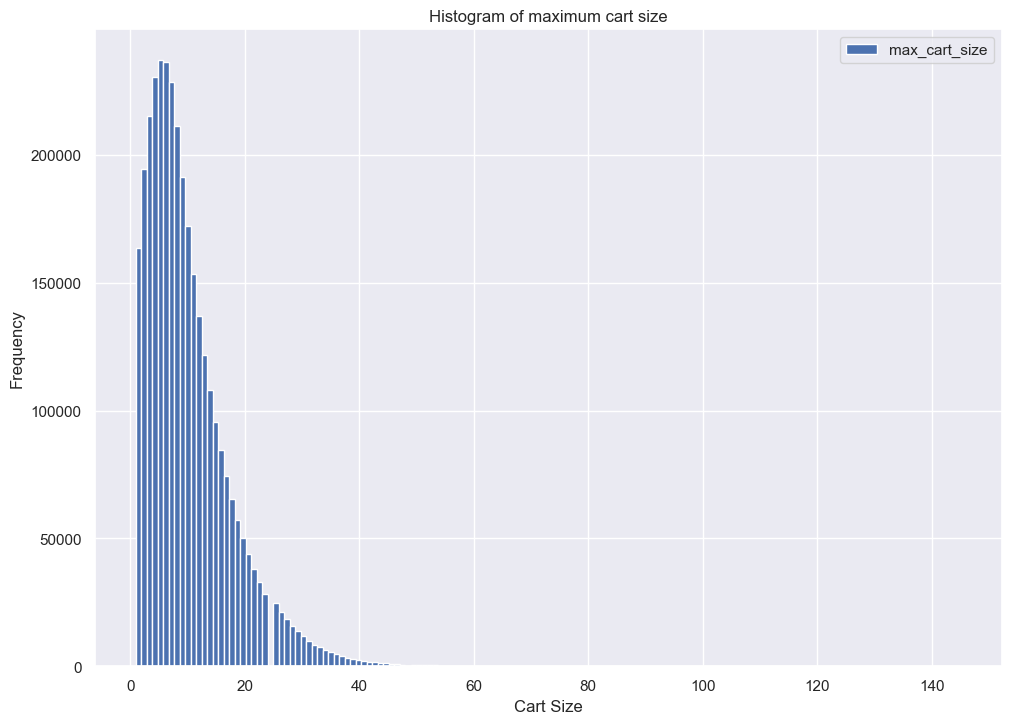

In [55]:
#plot histogram of maximum cart size  - > which is generated by add to cart order 

sns.set(rc={'figure.figsize':(11.7,8.27)})
max_cart_size = prior_train_orders.groupby(['order_id'])['add_to_cart_order'].aggregate(np.max)\
                                                            .reset_index(name = 'max_cart_size')
ax = max_cart_size['max_cart_size'].plot.hist(bins = 150, color = 'b')
ax.set_xlabel("Cart Size")
ax.set_title('Histogram of maximum cart size')
ax.legend()

In [56]:
max_cart_size['max_cart_size'].value_counts()[:1]

5    237225
Name: max_cart_size, dtype: int64

#### 4.1.10 Day of week

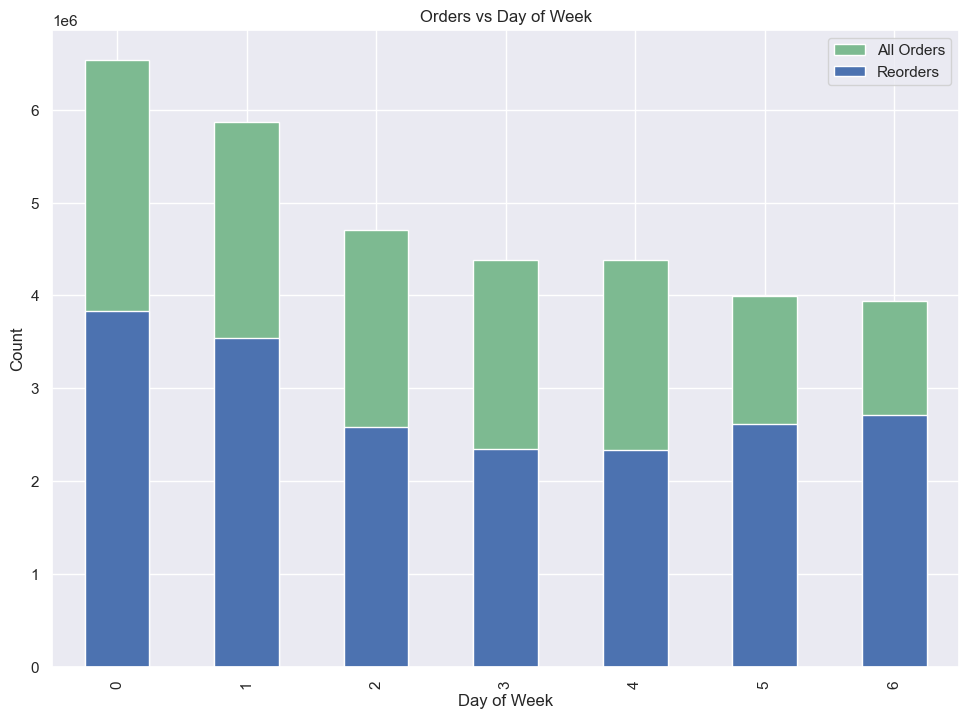

In [57]:
# how many products were ordered and reordered on a particular day of week

sns.set_theme(context='notebook', style='darkgrid', palette="crest")
ax = prior_train_orders['order_dow'].value_counts().plot.bar()
ax = prior_train_orders[prior_train_orders['reordered']==1].groupby(['order_dow']).size().plot.bar(color = 'b')
ax.set_xlabel("Day of Week")
ax.set_ylabel("Count")
ax.set_title('Orders vs Day of Week')
ax.legend(["All Orders", "Reorders"])

#### 4.1.11 Hour of Day

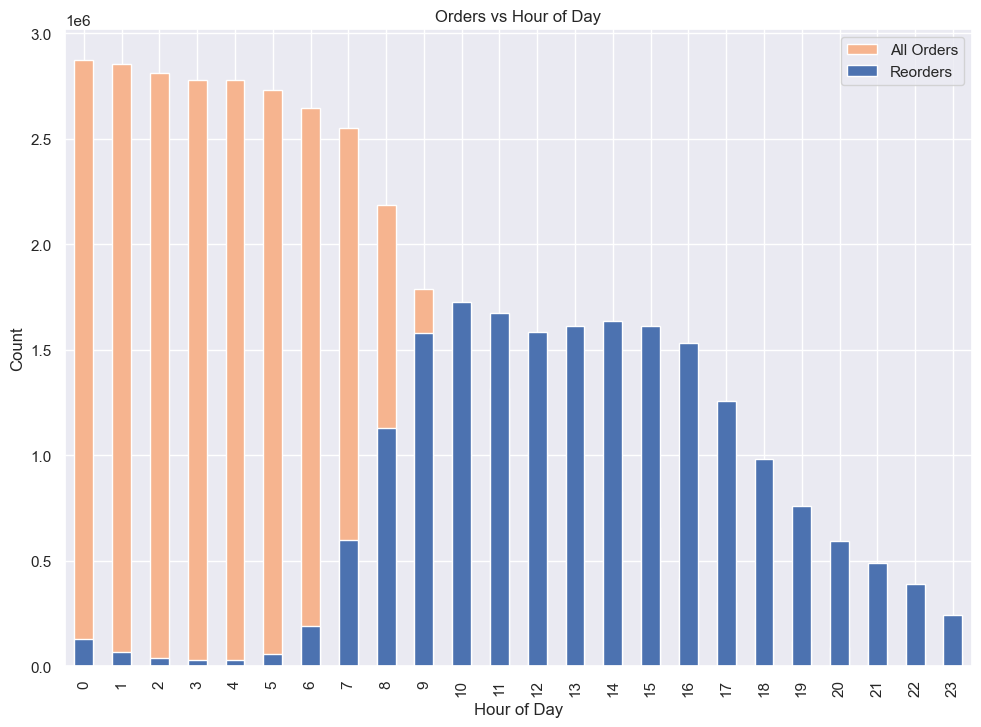

In [58]:
#how many products were ordered and reordered on a particular hour of day

sns.set_theme(context='notebook', style='darkgrid', palette="rocket_r")
ax = prior_train_orders['order_hour_of_day'].value_counts().plot.bar()
ax = prior_train_orders[prior_train_orders['reordered']==1].groupby(['order_hour_of_day']).size().plot.bar(color = 'b')
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Count")
ax.set_title('Orders vs Hour of Day')
ax.legend(["All Orders", "Reorders"])

#### 4.1.13 Days since prior order

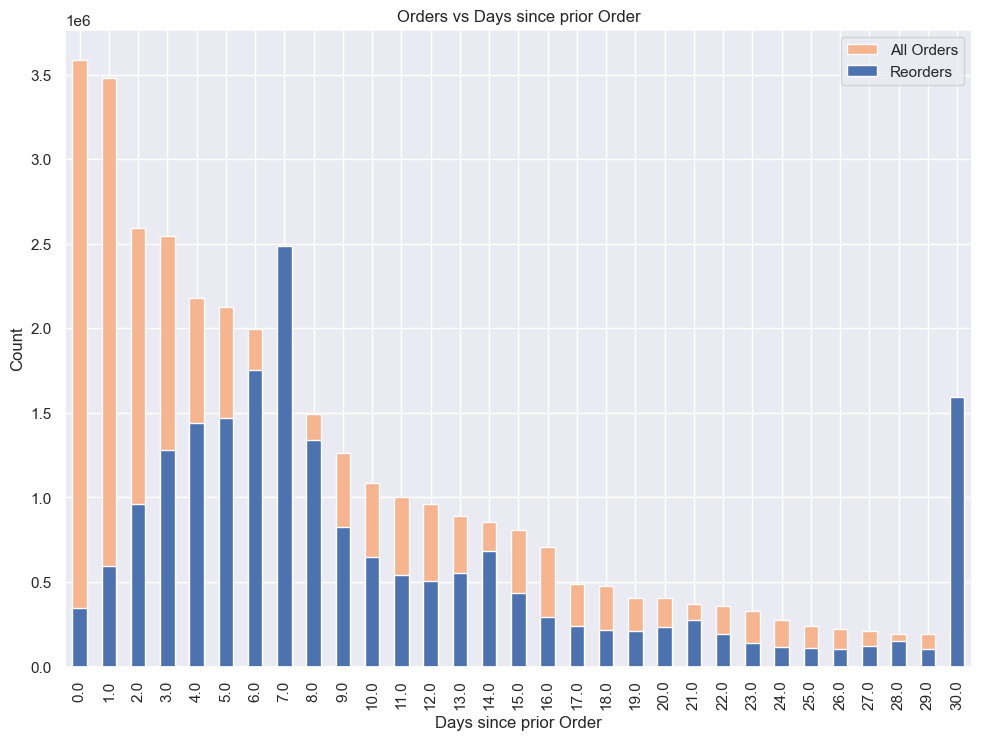

In [59]:
# After how mamy days user ordered / reordered a product

sns.set_theme(context='notebook', style='darkgrid', palette="rocket_r")
ax = prior_train_orders['days_since_prior_order'].value_counts().plot.bar()
ax = prior_train_orders[prior_train_orders['reordered']==1].groupby(['days_since_prior_order']).size().plot.bar(color = 'b')
ax.set_xlabel("Days since prior Order")
ax.set_ylabel("Count")
ax.set_title('Orders vs Days since prior Order')
ax.legend(["All Orders", "Reorders"])

### Analysis of weekly buyers and monthly buyers

#### Frequently brought product by weekly buyers

Text(0.5, 1.0, 'Frequently reordered product by weekly buyers')

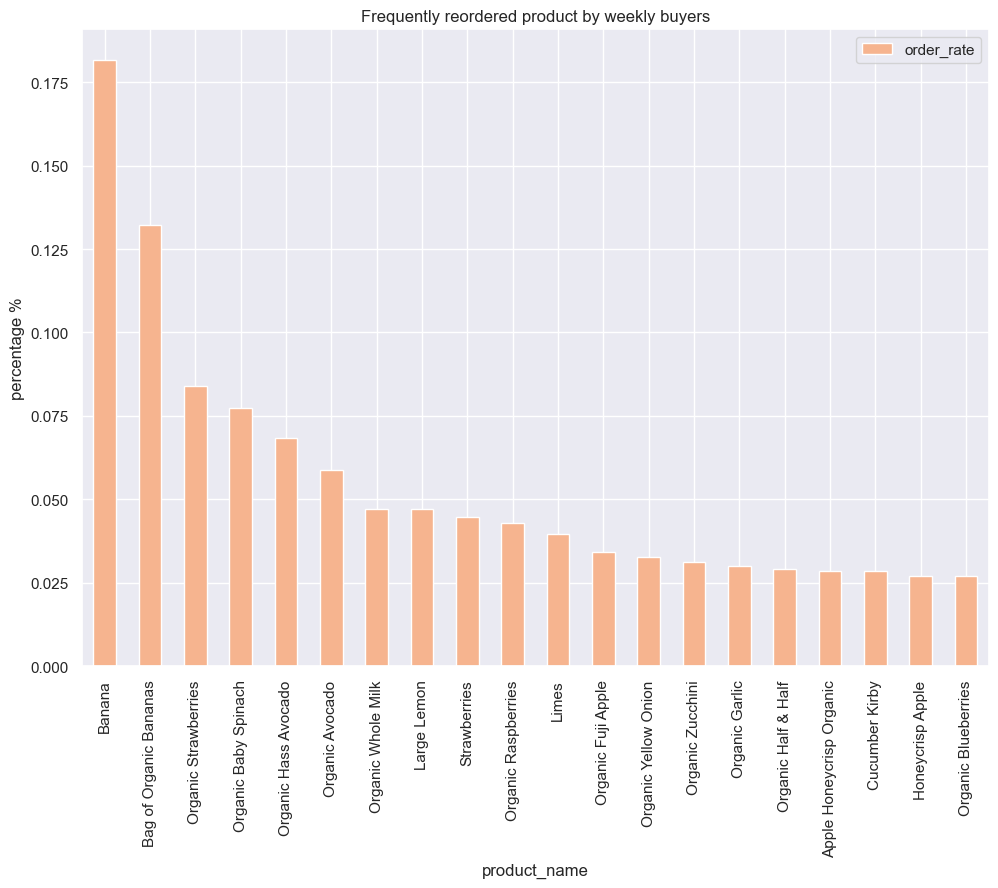

In [60]:
df = prior_train_orders[(prior_train_orders['days_since_prior_order']==7.0) & (prior_train_orders['reordered']==1.0)].groupby('product_name')['product_name'].size().\
            reset_index(name = 'order_rate').sort_values(by = 'order_rate', ascending = False)
df['order_rate'] = df['order_rate']/ prior_train_orders[(prior_train_orders['days_since_prior_order']==7.0) & (prior_train_orders['reordered']==1.0)]['order_id'].nunique()
df.set_index('product_name', inplace = True)

#top 20 frequently reordered product
ax = df[:20].plot.bar()
ax.set_ylabel("percentage %")
ax.set_title('Frequently reordered product by weekly buyers')

In [61]:
df[:20]

,order_rate
product_name,
Banana,0.181724
Bag of Organic Bananas,0.132152
Organic Strawberries,0.083824
Organic Baby Spinach,0.077275
Organic Hass Avocado,0.068253
Organic Avocado,0.058786
Organic Whole Milk,0.047242
Large Lemon,0.047144
Strawberries,0.044832


Text(0.5, 1.0, 'Frequently reordered product by monthly buyers')

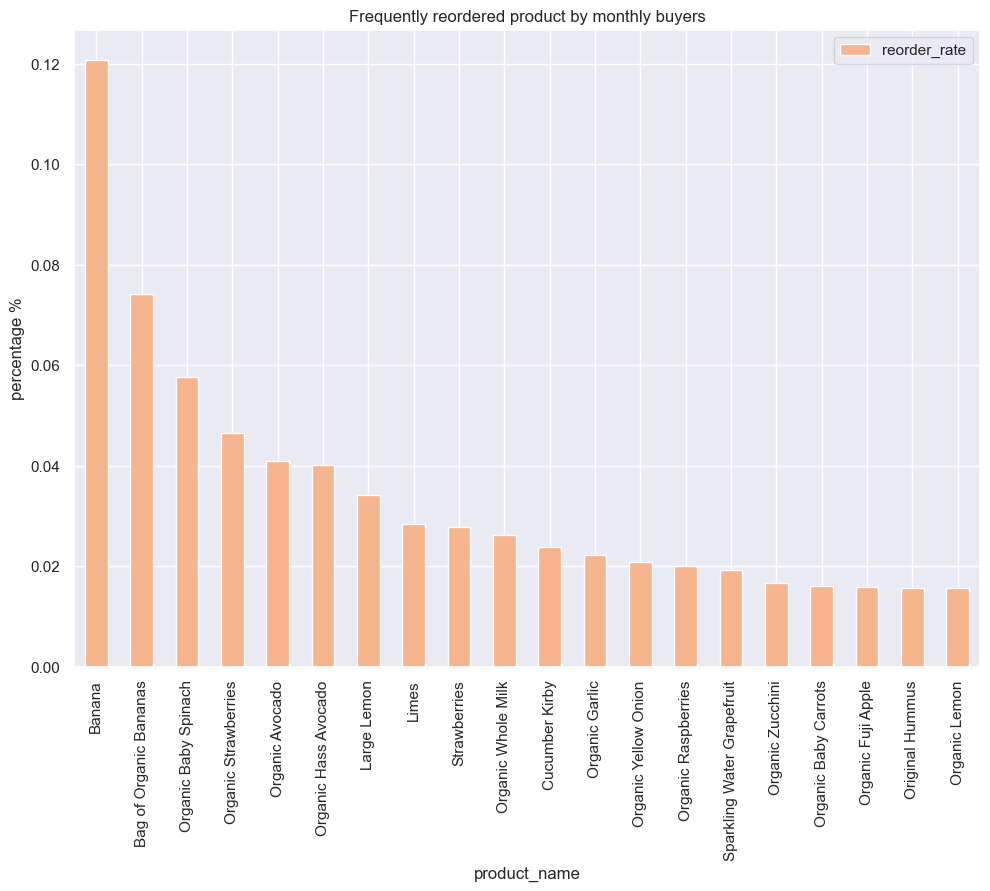

In [62]:
df = prior_train_orders[(prior_train_orders['days_since_prior_order']==30.0) & (prior_train_orders['reordered']==1.0)].\
        groupby('product_name')['product_name'].size().\
        reset_index(name = 'reorder_rate').sort_values(by = 'reorder_rate', ascending = False)
df['reorder_rate'] = df['reorder_rate']/prior_train_orders[(prior_train_orders['days_since_prior_order']==30.0) & (prior_train_orders['reordered']==1)]\
                    ['order_id'].nunique()
df.set_index('product_name', inplace = True)

#top 20 frequently reordered product
ax = df[:20].plot.bar()
ax.set_ylabel("percentage %")
ax.set_title('Frequently reordered product by monthly buyers')

In [63]:
df[:20]

,reorder_rate
product_name,
Banana,0.120750
Bag of Organic Bananas,0.074116
Organic Baby Spinach,0.057675
Organic Strawberries,0.046598
Organic Avocado,0.040948
Organic Hass Avocado,0.040223
Large Lemon,0.034213
Limes,0.028454
Strawberries,0.027699


<Axes: >

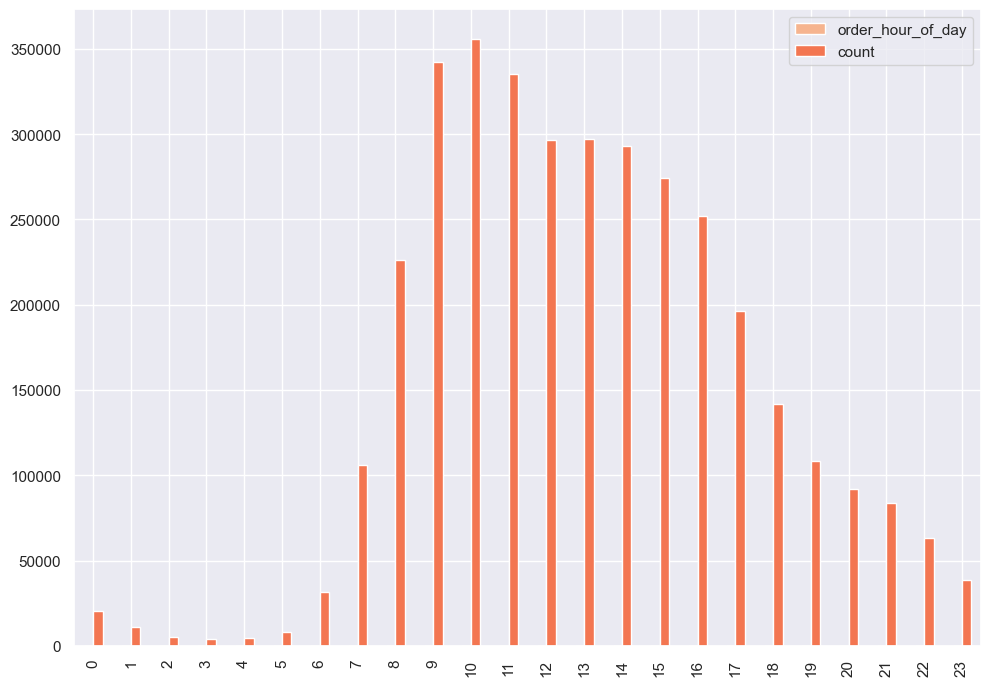

In [64]:
prior_train_orders[(prior_train_orders['days_since_prior_order']==7.0)].\
    groupby('order_hour_of_day')['order_hour_of_day'].count().\
    reset_index(name = 'count').plot.bar()

<Axes: >

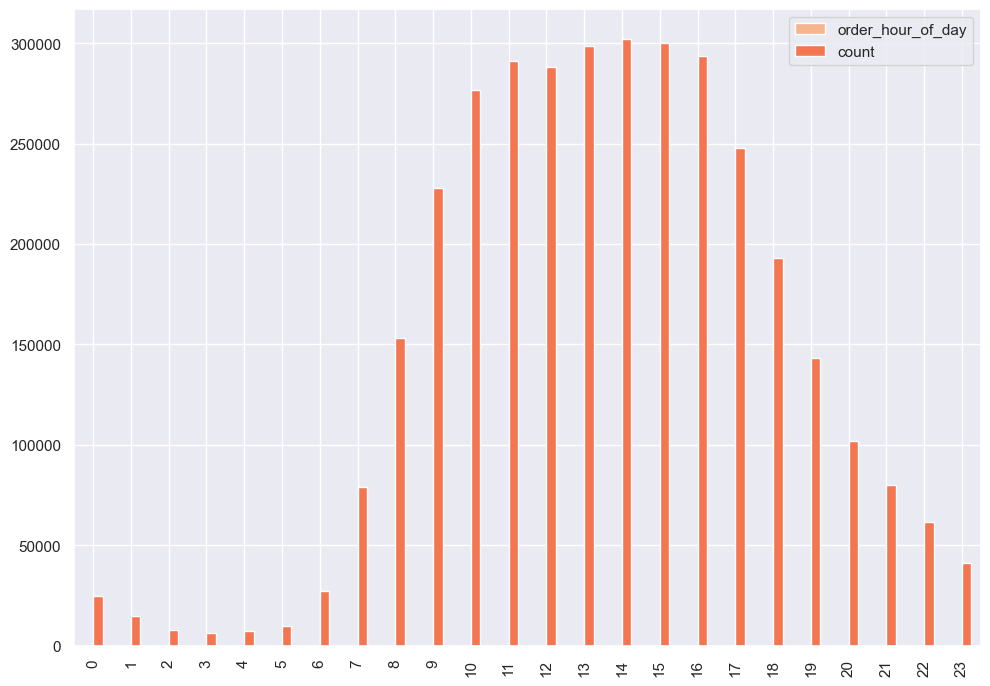

In [65]:
prior_train_orders[(prior_train_orders['days_since_prior_order']==30.0)].\
    groupby('order_hour_of_day')['order_hour_of_day'].count().\
    reset_index(name = 'count').plot.bar()

### 4.2 Bivariate Analysis

#### 4.2.1 How day of week and hour of day impact product order/reorder ?

In [66]:
order_day = prior_train_orders.groupby(['order_dow'])['order_id'].count().reset_index(name = 'count')

In [67]:
#ques : how many products were reordered per day?

reorder_day = prior_train_orders[prior_train_orders['reordered']==1].groupby(['order_dow','order_hour_of_day'])['order_id'].count().reset_index(name = 'reorder_rate')
reorder_day = pd.merge(reorder_day, order_day, on = 'order_dow', how = 'left')
reorder_day['reorder_rate'] = reorder_day['reorder_rate']/reorder_day['count']
reorder_day.drop('count', axis = 1, inplace = True)
reorder_day = reorder_day.pivot('order_dow','order_hour_of_day','reorder_rate')
reorder_day = pd.DataFrame(reorder_day.to_records())
reorder_day.set_index("order_dow", inplace = True)
reorder_day

C:\Users\19459\AppData\Local\Temp\ipykernel_24876\2495611337.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  reorder_day = reorder_day.pivot('order_dow','order_hour_of_day','reorder_rate')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,,,,
0,0.003569,0.002003,0.001152,0.000816,0.000734,0.001113,0.003477,0.013783,0.030964,0.043079,0.049074,0.049980,0.049616,0.051980,0.052577,0.051500,0.046587,0.036508,0.026347,0.020451,0.017612,0.015058,0.011650,0.006853
1,0.003876,0.001901,0.001056,0.000716,0.000806,0.001594,0.006162,0.019530,0.038739,0.057807,0.060637,0.054517,0.048405,0.047676,0.047370,0.045620,0.042959,0.034735,0.026416,0.020138,0.015485,0.012374,0.009331,0.005821
2,0.003996,0.001952,0.001122,0.000971,0.000924,0.001850,0.006600,0.018659,0.033406,0.048240,0.051230,0.049132,0.045331,0.046056,0.046363,0.046002,0.045726,0.037919,0.030994,0.023377,0.017665,0.014161,0.010909,0.007136
3,0.003951,0.001902,0.001238,0.000838,0.000988,0.001856,0.006713,0.018484,0.032076,0.044174,0.048326,0.047311,0.044449,0.045616,0.045376,0.047450,0.046031,0.039393,0.032025,0.024665,0.018410,0.015161,0.012387,0.007467
4,0.003636,0.001956,0.001167,0.000939,0.001064,0.001935,0.006760,0.019075,0.031919,0.043312,0.047918,0.046579,0.044294,0.045310,0.045854,0.046413,0.045973,0.039467,0.032050,0.025993,0.020395,0.017036,0.013853,0.008225
5,0.003866,0.002017,0.001265,0.001085,0.001246,0.002161,0.006926,0.019394,0.033038,0.046145,0.050903,0.049886,0.046430,0.047044,0.048975,0.048571,0.046317,0.037880,0.029896,0.022780,0.017518,0.014026,0.011095,0.007436
6,0.003895,0.002295,0.001408,0.000962,0.000999,0.001416,0.004487,0.016525,0.032950,0.042143,0.046748,0.047336,0.046944,0.047479,0.049617,0.047506,0.044149,0.036237,0.028780,0.021727,0.016806,0.014701,0.012001,0.008133


#### 4.2.2 Products vs hour of the day / day of week
#### Frequently brought product on any hour/day

In [69]:
#get row with maximum value after groupby
#ref:https://stackoverflow.com/a/15705958/11533069

x = prior_train_orders.groupby(['order_dow','order_hour_of_day','product_name'])['product_name'].size().reset_index(name = 'count')
idx = x.groupby(['order_dow','order_hour_of_day'], sort=False)['count'].transform(max) == x['count']
x = x[idx].drop_duplicates(subset=['order_dow','order_hour_of_day'], keep='first')
x = x.pivot(index = 'order_dow',columns = 'order_hour_of_day',values = 'product_name')
x

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,,,,
0,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana
1,Bag of Organic Bananas,Banana,Banana,Bag of Organic Bananas,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana
2,Bag of Organic Bananas,Bag of Organic Bananas,Bag of Organic Bananas,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana
3,Bag of Organic Bananas,Bag of Organic Bananas,Bag of Organic Bananas,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Bag of Organic Bananas
4,Bag of Organic Bananas,Bag of Organic Bananas,Banana,Bag of Organic Bananas,Bag of Organic Bananas,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana
5,Banana,Bag of Organic Bananas,Bag of Organic Bananas,Bag of Organic Bananas,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana
6,Banana,Banana,Bag of Organic Bananas,Banana,Bag of Organic Bananas,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana


__Analysis__:

- we can see that on any day - any hour most frequently ordered product is Banana and Bag of organic bananas

#### 4.2.3  aisles vs hour of the day vs day of week

we will check from which aisles products were frequently ordered / reordered  every hour

In [70]:
#ques : most frequently ordered product aisle by hour ?

#get row with maximum value after groupby
#ref:https://stackoverflow.com/a/15705958/11533069

x = prior_train_orders.groupby(['order_dow','order_hour_of_day','aisle'])['aisle'].size().reset_index(name = 'count')
idx = x.groupby(['order_dow','order_hour_of_day'], sort=False)['count'].transform(max) == x['count']
x = x[idx].drop_duplicates(subset=['order_dow','order_hour_of_day'], keep='first')
x = x.pivot(index = 'order_dow',columns = 'order_hour_of_day',values = 'aisle')
x

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,,,,
0,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits
1,fresh fruits,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits
2,fresh fruits,fresh vegetables,fresh vegetables,fresh vegetables,fresh fruits,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits
3,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits
4,fresh vegetables,fresh vegetables,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh vegetables
5,fresh vegetables,fresh vegetables,fresh fruits,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh vegetables,fresh vegetables
6,fresh vegetables,fresh vegetables,fresh fruits,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh fruits,fresh vegetables,fresh fruits,fresh vegetables,fresh vegetables,fresh vegetables


In [71]:
# department vs hour of the day

#ques : most frequently ordered product department by hour ?

#get row with maximum value after groupby
#ref:https://stackoverflow.com/a/15705958/11533069

x = prior_train_orders.groupby(['order_dow','order_hour_of_day','department'])['department'].size().reset_index(name = 'count')
idx = x.groupby(['order_dow','order_hour_of_day'], sort=False)['count'].transform(max) == x['count']
x = x[idx].drop_duplicates(subset=['order_dow','order_hour_of_day'], keep='first')
x = x.pivot(index = 'order_dow',columns = 'order_hour_of_day',values = 'department')
x

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,,,,
0,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce
1,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce
2,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce
3,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce
4,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce
5,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce
6,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce


#### 4.3.1 products which were never ordered / reordered ?

In [72]:
#products which were never ordered

products[(~products.product_name.isin(prior_train_orders.product_name))]

,product_id,product_name,aisle_id,department_id
3629,3630,Protein Granola Apple Crisp,57,14
7044,7045,Unpeeled Apricot Halves in Heavy Syrup,88,13
46624,46625,Single Barrel Kentucky Straight Bourbon Whiskey,31,7


#### 4.3.2 Maximum cart size after N days since prior order ?

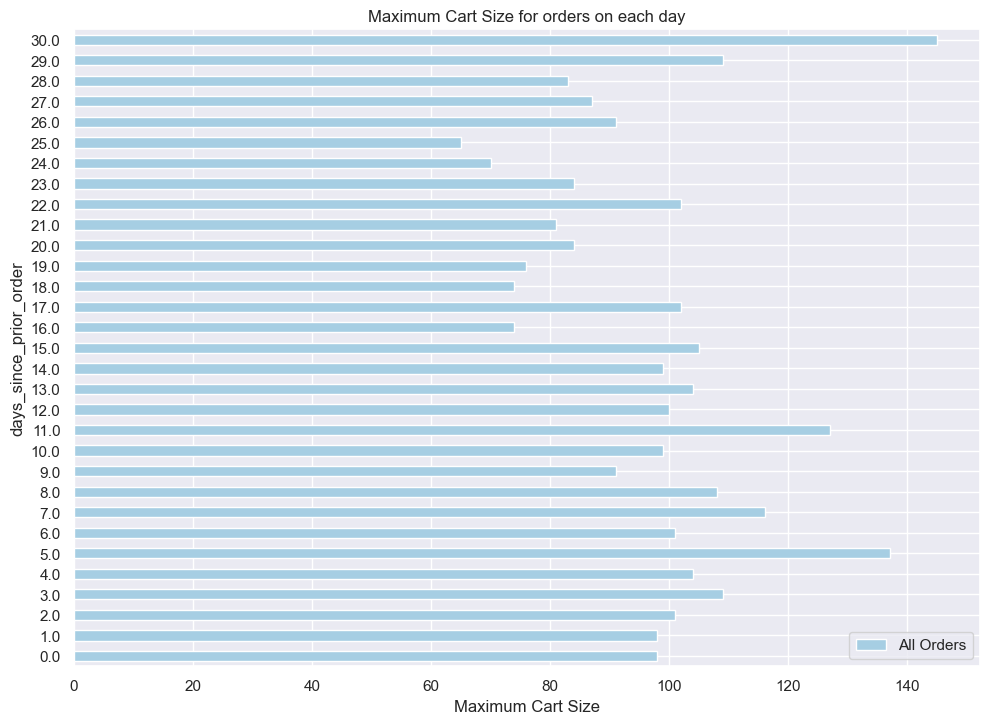

In [74]:
#ques : Average cart size after N days since prior order ?

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = prior_train_orders.groupby(['days_since_prior_order'])['add_to_cart_order'].aggregate(np.max).plot(kind='barh',colormap='Paired')
ax.set_xlabel("Maximum Cart Size")
ax.set_title('Maximum Cart Size for orders on each day')
ax.legend(["All Orders"])

#### 4.3.3 How much position of product in the cart impact reorder ?

C:\Users\19459\AppData\Local\Temp\ipykernel_24876\2701052561.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  apply(lambda x: x / float(x.sum()))}).reset_index()


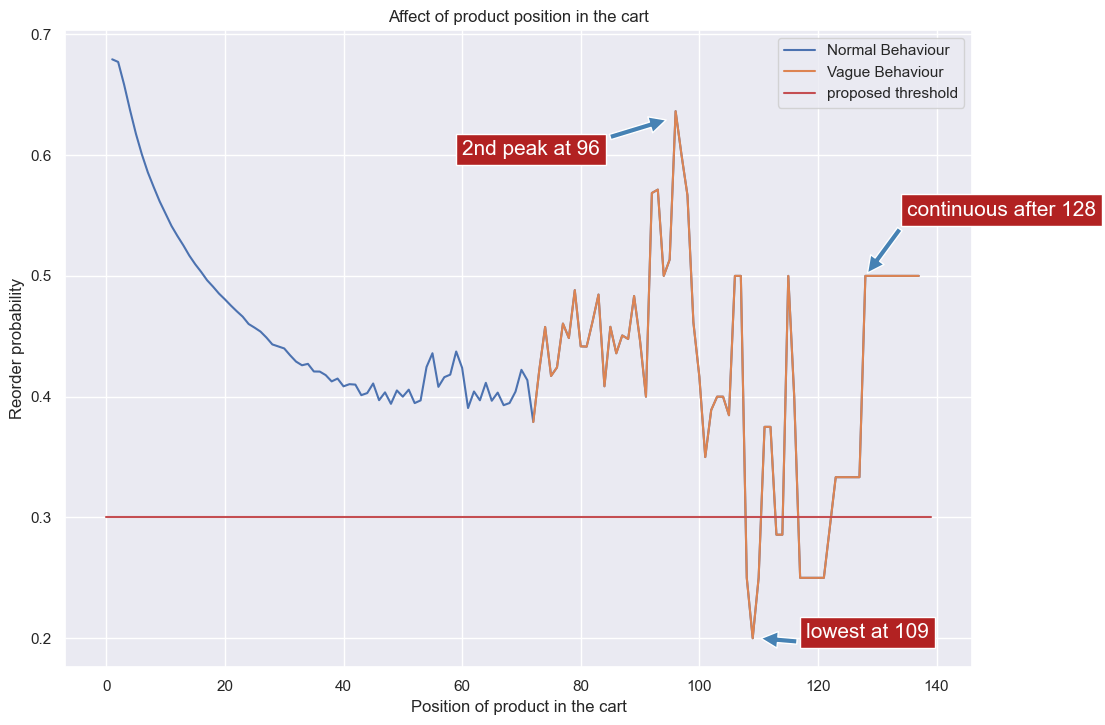

In [75]:
#ques : How much position of product in the cart impact reorder ?

df = pd.DataFrame({'reorder_rate': prior_train_orders.groupby(['add_to_cart_order','reordered'])['reordered'].\
                                                       count().groupby(level=0).\
                                                       apply(lambda x: x / float(x.sum()))}).reset_index()
ax = df[df['reordered']==1].set_index('add_to_cart_order')['reorder_rate'].plot()
ax = df[df['reordered']==1].set_index('add_to_cart_order')['reorder_rate'][71:].plot()
x = [*range(0,140)]
y = [0.3 for _ in range(140)]
ax.plot(x, y, '-r')
ax.set_xlabel('Position of product in the cart')
ax.set_ylabel('Reorder probability')
ax.set_title('Affect of product position in the cart')

#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html
ax.annotate('lowest at 109', xy=(110, 0.2), xytext=(118, 0.2),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')
ax.annotate('continuous after 128', xy=(128, 0.5), xytext=(135, 0.55),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')
ax.annotate('2nd peak at 96', xy=(95, 0.63), xytext=(60, 0.6),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')
ax.legend(["Normal Behaviour", "Vague Behaviour", "proposed threshold"])

#### 4.3.4 Are there any users whose order contains only reordered products ?

In [76]:
# Are there any users whose order contains only reordered products ?

df = prior_train_orders.groupby(['user_id','order_id','reordered'])['reordered'].count()
df = (df / df.groupby(level=1).sum()).reset_index(name = 'reorder_prob')
df = pd.DataFrame(df[(df['reordered']==1) & (df['reorder_prob']==1.0)]['user_id'].value_counts().reset_index(name = 'count'))
df.columns = ['user_id', 'count']

#top 10 user_id with most number of orders with all reordered products
df[:10]

,user_id,count
0,99753,99
1,26489,96
2,17997,94
3,100935,94
4,69919,93
5,175680,92
6,145481,91
7,140753,91
8,39993,90
9,127577,90


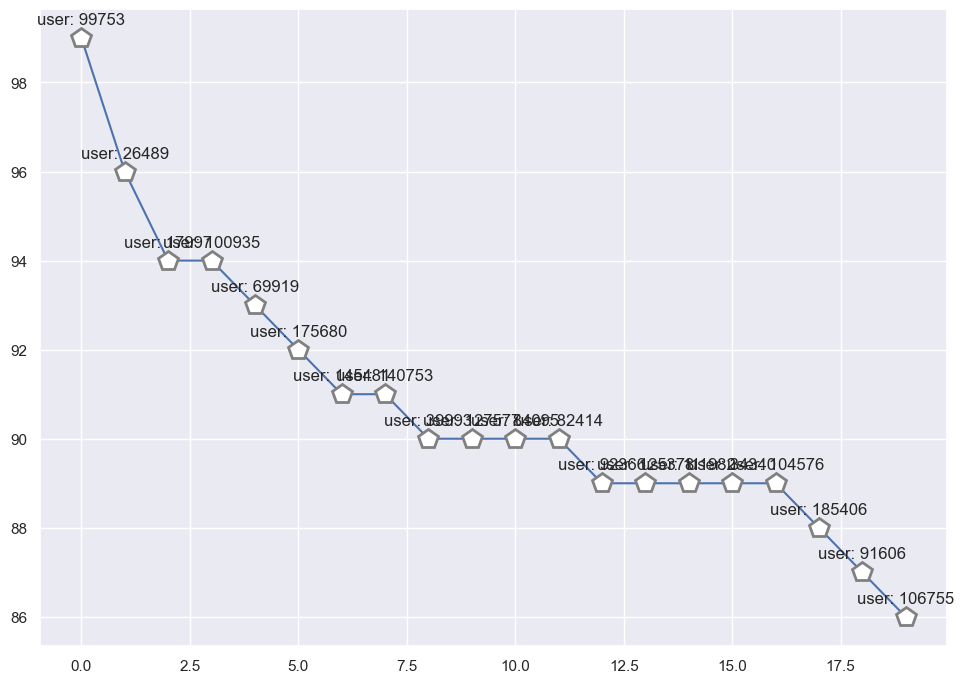

In [77]:
usr_ids = df['user_id'][:20].tolist()
counts = df['count'][:20].tolist()

#https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
plt.plot(counts)
for i,c in enumerate(counts):
    plt.plot(i, c, '-p', color='gray', markersize=15, linewidth=4,
         markerfacecolor='white',markeredgecolor='gray',markeredgewidth=2)
    plt.annotate("user: "+str(usr_ids[i]), # this is the text
                 (i,c), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') 